In [1]:
import matplotlib.pyplot as plt

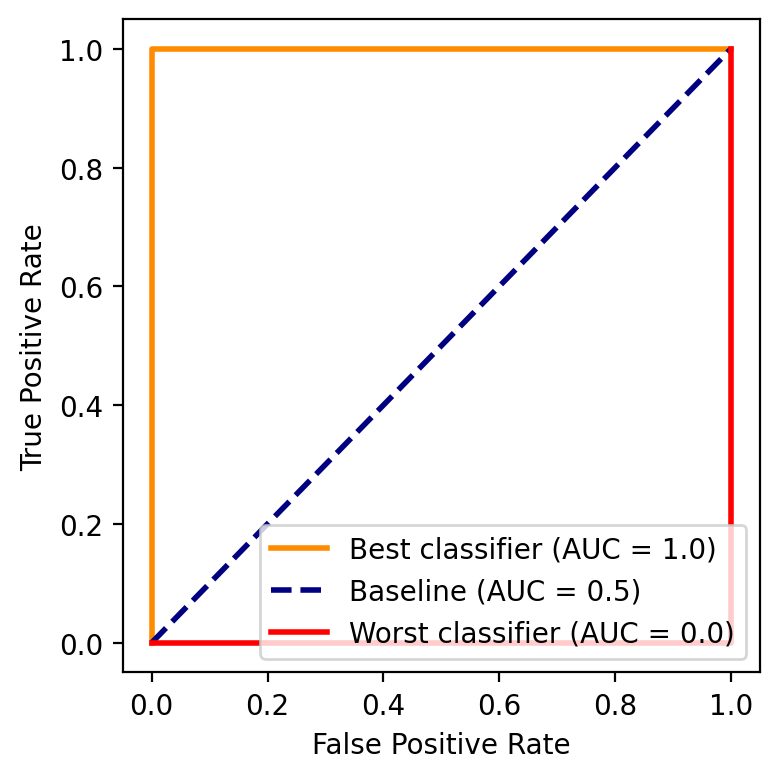

In [2]:
fig, ax = plt.subplots(dpi=200, figsize=(4,4))
lw = 2
plt.plot(
    [0.0,0.0,1.0],
    [0.0,1.0,1.0],
    color="darkorange",
    lw=lw,
    label="Best classifier (AUC = 1.0)",          # AUC: reflects performance from plot with a single score
)
plt.plot([0, 1], [0, 1],                                 # Baseline performance (flipping a coin)
         color="navy", 
         lw=lw, 
         linestyle="--", 
         label='Baseline (AUC = 0.5)')
plt.plot(
    [0.0,1.0,1.0],
    [0.0,0.0,1.0],
    color="red",
    lw=lw,
    label="Worst classifier (AUC = 0.0)",
)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curve.pdf")